Download a genomic sequence of length around 500-5000 from one of those data bases: UniProt, ENA or RefSeq. N is the length of the sequence, in bases.
Use this “genome” as a starting point in a short program (R or Python) that applies 𝑝 % mutations in each step, uniformly distributed along the sequence. A mutation is a base change, we ignore indels here. Each mutation (specifically its location along the genome) is independent of all other mutations. This means, that a new mutation could “hit” a base that had already mutated before. Therefore, the real mutation rate (measured by comparing to the original) is inherently lower than the mutation rate that is applied.
Run this procedure for a given 𝑝 for a few hundred or thousand steps.
In each step, count how many bases are different from the original sequence (“real mutation rate”).
Repeat for a couple of 𝑝, ranging from 0.1 to, say, 20.
Plot the curves (percentage of real mutations against mutation rate applied) for each 𝑝.
What does this plot demonstrate? Think of the 𝑥𝑃𝐴𝑀 matrices.

In [77]:
import os
from Bio import SeqIO
from Bio import Entrez
import random
import matplotlib.pyplot as plt
Entrez.email = "k11850713@students.jku.at"  # Always tell NCBI who you are
filename = "EU490707.gbk"
if not os.path.isfile(filename):

    net_handle = Entrez.efetch(db="nucleotide", id="1494082", rettype="gb", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved")

print("Parsing...")
record = SeqIO.read(filename, "genbank")
print(record)

Parsing...
ID: AA027948.1
Name: AA027948
Description: zk06e04.s1 Soares_pregnant_uterus_NbHPU Homo sapiens cDNA clone IMAGE:469758 3', mRNA sequence
Database cross-references: BioSample:SAMN00155083
Number of features: 1
/molecule_type=mRNA
/topology=linear
/data_file_division=EST
/date=28-JAN-2011
/accessions=['AA027948']
/sequence_version=1
/keywords=['EST']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Generation and analysis of 280,000 human expressed sequence tags', ...)]
/comment=Contact: Wilson RK
Washington University School of Medicine
4444 Forest Park Parkway, Box 8501, St. Louis, MO 63108
Tel: 314 286 1800
Fax: 314 286 1810
Email: est@watson.wustl.edu
This clone is available royalty-free through LLNL ; contact the
IMAGE Consortium (info@image.llnl.

In [78]:
print("- ID of the record:")
print(record.id)

print("\n- Brief description of the record:")
print(record.description)

print("\n- Annotations that come with the record (given as a python dictionary):")
print(record.annotations)

print("\n- The sequence in this record:")
print(record.seq)

- ID of the record:
AA027948.1

- Brief description of the record:
zk06e04.s1 Soares_pregnant_uterus_NbHPU Homo sapiens cDNA clone IMAGE:469758 3', mRNA sequence

- Annotations that come with the record (given as a python dictionary):
{'molecule_type': 'mRNA', 'topology': 'linear', 'data_file_division': 'EST', 'date': '28-JAN-2011', 'accessions': ['AA027948'], 'sequence_version': 1, 'keywords': ['EST'], 'source': 'Homo sapiens (human)', 'organism': 'Homo sapiens', 'taxonomy': ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo'], 'references': [Reference(title='Generation and analysis of 280,000 human expressed sequence tags', ...)], 'comment': 'Contact: Wilson RK\nWashington University School of Medicine\n4444 Forest Park Parkway, Box 8501, St. Louis, MO 63108\nTel: 314 286 1800\nFax: 314 286 1810\nEmail: est@watson.wustl.edu\nThis clone is available royal

In [79]:
seq = record.seq
seq
myseq = str(seq).replace(' ', '')
# print sequence 
myseq

'ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGGGGGGAAAAATCAAGATTGGATTATCAATACGTATTTCACAGGAGATTTGAGTTTTGGCCCTGACAGAAGAACACGTACTAACCTGAAAAAGGCTACGTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGAGACGTCGATTTAAAAGGCCAGCCACTCACTGTAGCGTGACAACTCCCTCTGGGGTAGCCAGGAGCAGAGCTTGACCAACTNGGCATGGGAGCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC'

In [80]:
seq_list = list(myseq)

In [81]:
# Define the function for mutating sequence with threshold.
import random
def mutate_thre(string, mutation, threshold):
    char =  random.randint(0, len(string)-1) 
    return ''.join([mutation[char] if random.random() < threshold and char in mutation else char for char in string])

In [82]:
def difference(seq1):
    count = 0
    for i in range(len(seq1)):
        if seq1[i] != seq_list[i]:
            count += 1
    return count

In [83]:
# define iterative function with compute number of difference in baes and its percentage of mutation.


def iterative_mu (num,seq,mu_rate):
    
    selection = ['A','T','C','G']
    list_new = [0 for i in range(num)]
    list_diff = [0 for i in range(num)]
    list_percent = [0 for i in range(num)]

    
    for i in range(0,num):
        
        if i ==0:
            index = random.choice(selection)
            index_a = random.choice(selection)
            list_new[i] = mutate_thre(seq_list,{index:index_a}, mu_rate)
            list_diff[i] = difference(list_new[i])
            list_percent[i] = list_diff[i]/len(seq_list)
            
        
        else: 
            index = random.choice(selection)
            index_a = random.choice(selection)
            list_new[i] = mutate_thre(list_new[i-1],{index:index_a}, mu_rate)
            list_diff[i] = difference(list_new[i])
            list_percent[i] = list_diff[i]/len(seq_list)

            
    
    return list_new, list_diff, list_percent 

In [84]:
# Run 400 iteratives for mutation with the error percentage of 0.1 and then compute the number of mutations identified 
# and its mutation percentage for each iterative. 
mutation_01 = iterative_mu(400,seq_list,0.1)

In [85]:
# Please note that it is just a test for the previous functions.

# print mutated sequence of each iterative.
mutation_01[0]

['ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGCGGGGAAAAATCAAGATTGGATTATCAATACCTATTTCACACGACATTTGAGTTTTGGCCCTGACAGAAGAACACGTACTAACCTGAAAAAGGCTACCTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGAGACCTCGATTTAAAAGGCCAGCCACTCACTGTAGCCTGACAACTCCCTCTGGGGTAGCCAGGAGCAGAGCTTGACCAACTNCCCATGGGACCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC',
 'ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGCGGGGAAAAATCAAGATTGGATTATCAATACCTATTTCACACGACATTTGAGTTTTGGCCCTGACAGAAGAACACGTACTAACCTGAAAAAGGCTACCTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGAGACCTCGATTTAAAAGGCCAGCCACTCACTGTAGCCTGACAACTCCCTCTGGGGTAGCCAGGAGCAGAGCTTGACCAACTNCCCATGGGACCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC',
 'ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGACTTATATCCTGCGGGGAAAAATCAAGATTGGATTATCAACACCTACTTCACACGACATTCGAGTTTTGGCCCTGACAGAAGAACACGCACTAACCTGAAAAAGGCCACCTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGA

In [86]:
# iterations with different percentage of errors

percent_list = [0.1,0.5,1,5,10,15,20]
result_list = []

for i in percent_list:
    
    outcome = iterative_mu(400,seq_list,i)
    
    result_list.append(outcome)
    
    
    

In [87]:
# print mutated sequence of each iterative.
result_list[0][0]

['ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGGGGGGAAAAATCAAGATTGGATTATCAATACGTATTTCACAGGAGATTTGAGTTTTGGCCCTGACAGAAGAACACGTACTAACCTGAAAAAGGCTACGTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGAGACGTCGATTTAAAAGGCCAGCCACTCACTGTAGCGTGACAACTCCCTCTGGGGTAGCCAGGAGCAGAGCTTGACCAACTNGGCATGGGAGCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC',
 'ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGGGGGGAAAAATCAAGATTGGATTATCAATACGTATTTCACAGGAGATTTGAGTTTTGGCCCTGACAGAAGAACACGTACTAACCTGAAAAAGGCTACGTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGGTGAGAGAGACGTCGATTTAAAAGGCCAGCCACTCACTGTAGCGTGACAACTCCCTCTGGGGTAGCCAGGAGCAGAGCTTGACCAACTNGGCATGGGAGCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC',
 'ATTTTTGATTTATTGCATTCTGAAGTACTCCGGNNGGAGGGNCTNANAACGATCCGCTTTATCAGCAGTTCTAAAGCCTTATTACCTGAGATTTATATTCTGGAGGGAAAAATCAAGATTGGATTATCAATACGTATTTCACAGGAGATTTGAGTTTTAGCCCTGACAGAAAAACACGTACTAACCTGAAAAAGGCTACGTGAGATTAAAGAGAGAAACAGCTAAACACCAAATCCTGATGAGAGA

In [88]:
# print the number of mutations identified with p=0.1
result_list[0][1]

[0,
 0,
 7,
 14,
 24,
 36,
 36,
 36,
 41,
 47,
 53,
 60,
 70,
 76,
 78,
 82,
 82,
 89,
 89,
 94,
 99,
 99,
 102,
 105,
 110,
 110,
 110,
 114,
 127,
 131,
 131,
 135,
 142,
 148,
 156,
 160,
 165,
 169,
 172,
 175,
 175,
 175,
 175,
 179,
 179,
 184,
 184,
 188,
 189,
 192,
 193,
 193,
 194,
 193,
 194,
 199,
 199,
 203,
 203,
 206,
 206,
 206,
 202,
 205,
 208,
 213,
 212,
 211,
 216,
 216,
 221,
 221,
 224,
 226,
 227,
 227,
 230,
 231,
 231,
 230,
 235,
 236,
 239,
 244,
 244,
 247,
 247,
 246,
 247,
 247,
 247,
 247,
 245,
 245,
 246,
 249,
 249,
 248,
 247,
 246,
 246,
 244,
 244,
 246,
 246,
 248,
 255,
 257,
 259,
 262,
 264,
 267,
 269,
 269,
 269,
 269,
 271,
 269,
 271,
 271,
 275,
 275,
 274,
 274,
 274,
 278,
 276,
 276,
 276,
 280,
 282,
 283,
 282,
 282,
 280,
 277,
 280,
 280,
 280,
 277,
 276,
 275,
 275,
 274,
 275,
 276,
 276,
 277,
 281,
 282,
 281,
 281,
 282,
 282,
 282,
 284,
 286,
 286,
 290,
 289,
 286,
 286,
 285,
 282,
 282,
 281,
 278,
 277,
 275,
 276,
 276,

In [89]:
# print the percent of mutated with p=0.1
result_list[0][2]

[0.0,
 0.0,
 0.018867924528301886,
 0.03773584905660377,
 0.0646900269541779,
 0.09703504043126684,
 0.09703504043126684,
 0.09703504043126684,
 0.1105121293800539,
 0.12668463611859837,
 0.14285714285714285,
 0.16172506738544473,
 0.18867924528301888,
 0.20485175202156333,
 0.21024258760107817,
 0.2210242587601078,
 0.2210242587601078,
 0.2398921832884097,
 0.2398921832884097,
 0.25336927223719674,
 0.2668463611859838,
 0.2668463611859838,
 0.2749326145552561,
 0.2830188679245283,
 0.29649595687331537,
 0.29649595687331537,
 0.29649595687331537,
 0.30727762803234504,
 0.3423180592991914,
 0.353099730458221,
 0.353099730458221,
 0.3638814016172507,
 0.38274932614555257,
 0.39892183288409705,
 0.42048517520215634,
 0.431266846361186,
 0.444743935309973,
 0.4555256064690027,
 0.4636118598382749,
 0.4716981132075472,
 0.4716981132075472,
 0.4716981132075472,
 0.4716981132075472,
 0.48247978436657685,
 0.48247978436657685,
 0.49595687331536387,
 0.49595687331536387,
 0.5067385444743935,
 0

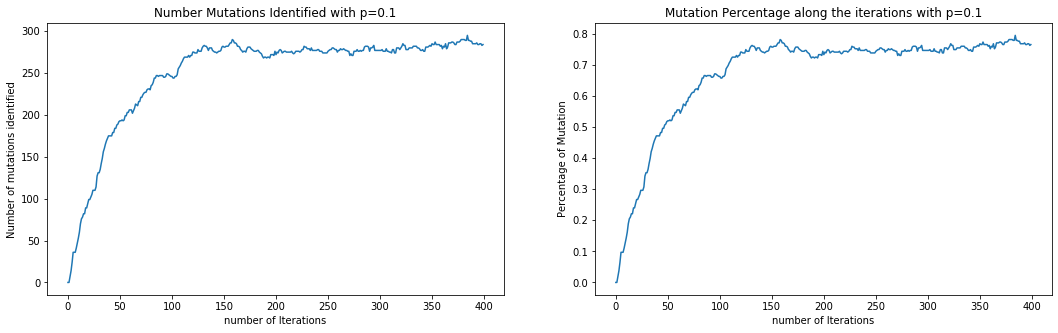

In [90]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=0.1


fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[0][1]
y_2 = result_list[0][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=0.1' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=0.1' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [91]:
# print mutated sequence of each iterative with percentage of mutation, p=0.5

result_list[1][0]

['ATTTTTGACCTACTGCATCCCGAAGTACCCCGGNNGGAGGGNCCNANAACGACCCGCTCTATCAGCAGTCCTAAAGCCCCATCACCCGAGACTTATACCCTGGGGGGAAAAATCAAGACTGGACCATCAATACGCACTTCACAGGAGATCTGAGTCTTGGCCCTGACAGAAGAACACGCACCAACCCGAAAAAGGCCACGCGAGATCAAAGAGAGAAACAGCCAAACACCAAATCCTGGCGAGAGAGACGCCGATCTAAAAGGCCAGCCACTCACCGCAGCGTGACAACTCCCCCTGGGGCAGCCAGGAGCAGAGCTCGACCAACCNGGCACGGGAGCGTGGGCCACGAGGGCACCTCCCCAGGAGCCCAC',
 'ATTTTTGACCAACAGCAACCCGAAGTACCCCGGNNGGAGGGNCCNANAACGACCCGCACTATCAGCAGTCCTAAAGCCCCATCACCCGAGACTAATACCCAGGGGGGAAAAATCAAGACTGGACCATCAATACGCACAACACAGGAGATCAGAGACATGGCCCAGACAGAAGAACACGCACCAACCCGAAAAAGGCCACGCGAGAACAAAGAGAGAAACAGCCAAACACCAAATCCTGGCGAGAGAGACGCCGAACTAAAAGGCCAGCCACACACCGCAGCGAGACAACACCCCCTGGGGCAGCCAGGAGCAGAGCACGACCAACCNGGCACGGGAGCGTGGGCCACGAGGGCACCACCCCAGGAGCCCAC',
 'ATTTTTGACCAACATCAACCCTAAGTACCCCGTNNGGATTGNCCNANAACTACCCGCACTATCAGCAGTCCTAAATCCCCATCACCCGATACTAATACCCAGTGTGGAAAAATCAATACTGGACCATCAATACTCACAACACAGGAGATCATATACATTTCCCAGACAGAAGAACACGCACCAACCCTAAAAAGGCCACTCGAGAACAAAGAGATAAACAGCCAAACACCAAATCCTGGCTAGATA

In [92]:
# print the number of mutations identified with p=0.5
result_list[1][1]

[41,
 60,
 97,
 132,
 160,
 186,
 186,
 213,
 213,
 215,
 227,
 232,
 233,
 246,
 273,
 270,
 270,
 260,
 267,
 270,
 267,
 267,
 271,
 272,
 272,
 274,
 274,
 276,
 272,
 274,
 273,
 277,
 272,
 265,
 269,
 270,
 273,
 275,
 278,
 278,
 280,
 280,
 280,
 287,
 287,
 288,
 272,
 272,
 274,
 274,
 287,
 289,
 285,
 280,
 278,
 279,
 288,
 291,
 286,
 286,
 285,
 286,
 286,
 282,
 282,
 281,
 279,
 267,
 267,
 276,
 276,
 276,
 277,
 274,
 274,
 274,
 275,
 284,
 276,
 276,
 276,
 273,
 269,
 269,
 262,
 267,
 265,
 262,
 264,
 264,
 270,
 270,
 266,
 268,
 264,
 265,
 265,
 266,
 269,
 267,
 264,
 257,
 257,
 264,
 264,
 264,
 268,
 270,
 270,
 268,
 268,
 271,
 270,
 270,
 274,
 274,
 276,
 279,
 279,
 279,
 279,
 281,
 279,
 279,
 281,
 281,
 282,
 282,
 278,
 269,
 270,
 270,
 265,
 266,
 268,
 268,
 268,
 257,
 257,
 257,
 257,
 254,
 255,
 255,
 255,
 259,
 259,
 259,
 260,
 265,
 265,
 263,
 263,
 263,
 263,
 263,
 260,
 258,
 267,
 276,
 276,
 276,
 268,
 263,
 262,
 275,
 274,
 

In [93]:
# print the percent of mutated with p=0.5
result_list[1][2]

[0.1105121293800539,
 0.16172506738544473,
 0.261455525606469,
 0.3557951482479784,
 0.431266846361186,
 0.5013477088948787,
 0.5013477088948787,
 0.5741239892183289,
 0.5741239892183289,
 0.5795148247978437,
 0.6118598382749326,
 0.6253369272237197,
 0.628032345013477,
 0.6630727762803235,
 0.7358490566037735,
 0.7277628032345014,
 0.7277628032345014,
 0.7008086253369272,
 0.7196765498652291,
 0.7277628032345014,
 0.7196765498652291,
 0.7196765498652291,
 0.7304582210242587,
 0.7331536388140162,
 0.7331536388140162,
 0.738544474393531,
 0.738544474393531,
 0.7439353099730458,
 0.7331536388140162,
 0.738544474393531,
 0.7358490566037735,
 0.7466307277628033,
 0.7331536388140162,
 0.7142857142857143,
 0.7250673854447439,
 0.7277628032345014,
 0.7358490566037735,
 0.7412398921832885,
 0.7493261455525606,
 0.7493261455525606,
 0.7547169811320755,
 0.7547169811320755,
 0.7547169811320755,
 0.7735849056603774,
 0.7735849056603774,
 0.7762803234501348,
 0.7331536388140162,
 0.733153638814016

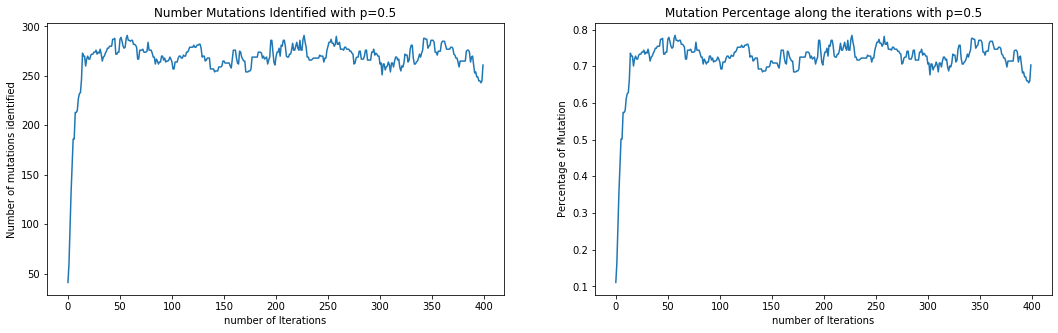

In [94]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=0.5

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[1][1]
y_2 = result_list[1][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=0.5' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=0.5' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [95]:
# print mutated sequence of each iterative with percentage of mutation, p=1

result_list[2][0]

['AGGGGGGAGGGAGGGCAGGCGGAAGGACGCCGGNNGGAGGGNCGNANAACGAGCCGCGGGAGCAGCAGGGCGAAAGCCGGAGGACCGGAGAGGGAGAGGCGGGGGGGAAAAAGCAAGAGGGGAGGAGCAAGACGGAGGGCACAGGAGAGGGGAGGGGGGGCCCGGACAGAAGAACACGGACGAACCGGAAAAAGGCGACGGGAGAGGAAAGAGAGAAACAGCGAAACACCAAAGCCGGGGGAGAGAGACGGCGAGGGAAAAGGCCAGCCACGCACGGGAGCGGGACAACGCCCGCGGGGGGAGCCAGGAGCAGAGCGGGACCAACGNGGCAGGGGAGCGGGGGCCACGAGGGCACCGCCCCAGGAGCCCAC',
 'AAAAAAAAAAAAAAACAAACAAAAAAACACCAANNAAAAAANCANANAACAAACCACAAAAACAACAAAACAAAAACCAAAAAACCAAAAAAAAAAAAACAAAAAAAAAAAAACAAAAAAAAAAAAACAAAACAAAAAACACAAAAAAAAAAAAAAAAAACCCAAACAAAAAAACACAAACAAACCAAAAAAAAACAACAAAAAAAAAAAAAAAAAAACAACAAAACACCAAAACCAAAAAAAAAAAACAACAAAAAAAAAAACCAACCACACACAAAAACAAAACAACACCCACAAAAAAAACCAAAAACAAAACAAAACCAACANAACAAAAAAACAAAAACCACAAAAACACCACCCCAAAAACCCAC',
 'GGGGGGGGGGGGGGGCGGGCGGGGGGGCGCCGGNNGGGGGGNCGNGNGGCGGGCCGCGGGGGCGGCGGGGCGGGGGCCGGGGGGCCGGGGGGGGGGGGGCGGGGGGGGGGGGGCGGGGGGGGGGGGGCGGGGCGGGGGGCGCGGGGGGGGGGGGGGGGGGCCCGGGCGGGGGGGCGCGGGCGGGCCGGGGGGGGGCGGCGGGGGGGGGGGGGGGGGGGCGGCGGGGCGCCGGGGCCGGGGGGGGGG

In [96]:
# print the number of mutations identified with p=1
result_list[2][1]

[84,
 176,
 193,
 193,
 193,
 273,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 273,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 281,
 281,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 273,
 273,
 285,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 273,
 281,
 281,
 281,
 281,
 281,
 273,
 273,
 281,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 273,
 256,
 256,
 256,
 285,
 285,
 281,
 273,
 256,

In [97]:
# print the percent of mutated with p=1
result_list[2][2]

[0.22641509433962265,
 0.4743935309973046,
 0.5202156334231806,
 0.5202156334231806,
 0.5202156334231806,
 0.7358490566037735,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7358490566037735,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7574123989218329,
 0.7574123989218329,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7681940700808625,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.735849056

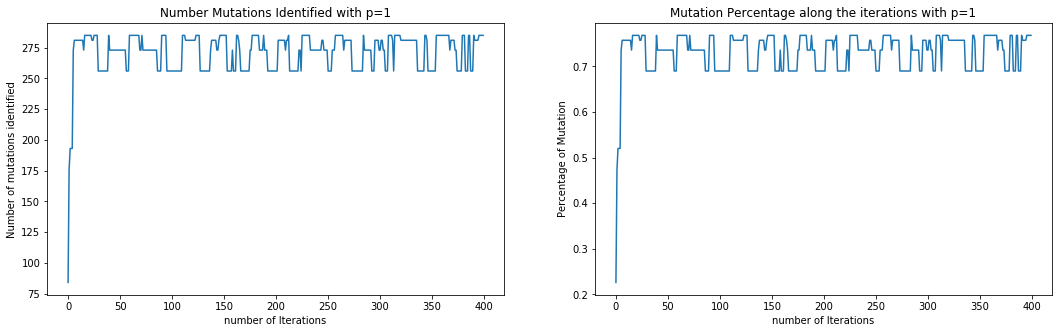

In [98]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=1

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[2][1]
y_2 = result_list[2][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=1' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=1' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [99]:
# print mutated sequence of each iterative with percentage of mutation, p=5

result_list[3][0]

['CTTTTTGCTTTCTTGCCTTCTGCCGTCCTCCGGNNGGCGGGNCTNCNCCCGCTCCGCTTTCTCCGCCGTTCTCCCGCCTTCTTCCCTGCGCTTTCTCTTCTGGGGGGCCCCCTCCCGCTTGGCTTCTCCCTCCGTCTTTCCCCGGCGCTTTGCGTTTTGGCCCTGCCCGCCGCCCCCGTCCTCCCCTGCCCCCGGCTCCGTGCGCTTCCCGCGCGCCCCCGCTCCCCCCCCCCTCCTGGTGCGCGCGCCGTCGCTTTCCCCGGCCCGCCCCTCCCTGTCGCGTGCCCCCTCCCTCTGGGGTCGCCCGGCGCCGCGCTTGCCCCCCTNGGCCTGGGCGCGTGGGCCCCGCGGGCCCCTCCCCCGGCGCCCCC',
 'CGGGGGGCGGGCGGGCCGGCGGCCGGCCGCCGGNNGGCGGGNCGNCNCCCGCGCCGCGGGCGCCGCCGGGCGCCCGCCGGCGGCCCGGCGCGGGCGCGGCGGGGGGGCCCCCGCCCGCGGGGCGGCGCCCGCCGGCGGGCCCCGGCGCGGGGCGGGGGGGCCCGGCCCGCCGCCCCCGGCCGCCCCGGCCCCCGGCGCCGGGCGCGGCCCGCGCGCCCCCGCGCCCCCCCCCCGCCGGGGGCGCGCGCCGGCGCGGGCCCCGGCCCGCCCCGCCCGGGCGCGGGCCCCCGCCCGCGGGGGGCGCCCGGCGCCGCGCGGGCCCCCCGNGGCCGGGGCGCGGGGGCCCCGCGGGCCCCGCCCCCGGCGCCCCC',
 'CGGGGGGCGGGCGGGCCGGCGGCCGGCCGCCGGNNGGCGGGNCGNCNCCCGCGCCGCGGGCGCCGCCGGGCGCCCGCCGGCGGCCCGGCGCGGGCGCGGCGGGGGGGCCCCCGCCCGCGGGGCGGCGCCCGCCGGCGGGCCCCGGCGCGGGGCGGGGGGGCCCGGCCCGCCGCCCCCGGCCGCCCCGGCCCCCGGCGCCGGGCGCGGCCCGCGCGCCCCCGCGCCCCCCCCCCGCCGGGGGCGCGC

In [100]:
# print the number of mutations identified with p=5
result_list[3][1]

[109,
 193,
 193,
 285,
 285,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 285,
 285,
 285,
 256,
 256,
 256,
 285,
 281,
 281,
 281,
 281,
 281,
 273,
 273,
 273,
 285,
 285,
 273,
 273,
 285,
 285,
 285,
 281,
 281,
 281,
 273,
 273,
 273,
 273,
 273,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 281,
 281,
 281,
 281,
 281,
 273,
 256,
 256,
 256,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285

In [101]:
# print the percent of mutated with p=5
result_list[3][2]

[0.29380053908355797,
 0.5202156334231806,
 0.5202156334231806,
 0.7681940700808625,
 0.7681940700808625,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7574123989218329,
 0.7574123989218329,
 0.757412398

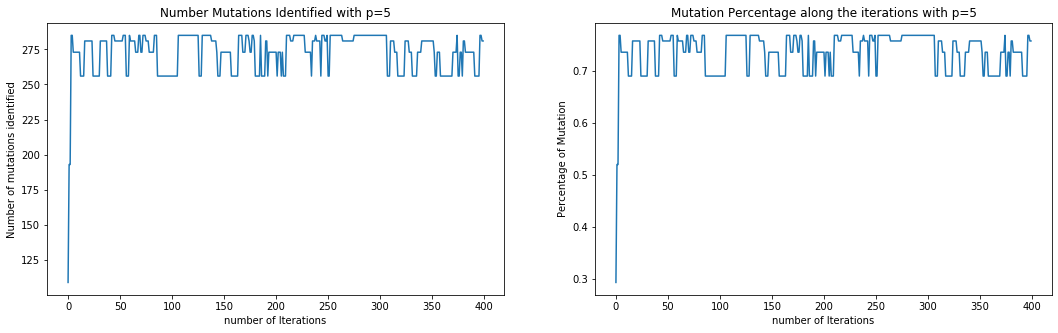

In [102]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=5

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[3][1]
y_2 = result_list[3][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=5' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=5' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [103]:
# print mutated sequence of each iterative with percentage of mutation, p=10

result_list[4][0]

['ATTTTTGATTTATTGTATTTTGAAGTATTTTGGNNGGAGGGNTTNANAATGATTTGTTTTATTAGTAGTTTTAAAGTTTTATTATTTGAGATTTATATTTTGGGGGGAAAAATTAAGATTGGATTATTAATATGTATTTTATAGGAGATTTGAGTTTTGGTTTTGATAGAAGAATATGTATTAATTTGAAAAAGGTTATGTGAGATTAAAGAGAGAAATAGTTAAATATTAAATTTTGGTGAGAGAGATGTTGATTTAAAAGGTTAGTTATTTATTGTAGTGTGATAATTTTTTTTGGGGTAGTTAGGAGTAGAGTTTGATTAATTNGGTATGGGAGTGTGGGTTATGAGGGTATTTTTTTAGGAGTTTAT',
 'ATTTTTGATTTATTGTATTTTGAAGTATTTTGGNNGGAGGGNTTNANAATGATTTGTTTTATTAGTAGTTTTAAAGTTTTATTATTTGAGATTTATATTTTGGGGGGAAAAATTAAGATTGGATTATTAATATGTATTTTATAGGAGATTTGAGTTTTGGTTTTGATAGAAGAATATGTATTAATTTGAAAAAGGTTATGTGAGATTAAAGAGAGAAATAGTTAAATATTAAATTTTGGTGAGAGAGATGTTGATTTAAAAGGTTAGTTATTTATTGTAGTGTGATAATTTTTTTTGGGGTAGTTAGGAGTAGAGTTTGATTAATTNGGTATGGGAGTGTGGGTTATGAGGGTATTTTTTTAGGAGTTTAT',
 'GTTTTTGGTTTGTTGTGTTTTGGGGTGTTTTGGNNGGGGGGNTTNGNGGTGGTTTGTTTTGTTGGTGGTTTTGGGGTTTTGTTGTTTGGGGTTTGTGTTTTGGGGGGGGGGGTTGGGGTTGGGTTGTTGGTGTGTGTTTTGTGGGGGGTTTGGGTTTTGGTTTTGGTGGGGGGGTGTGTGTTGGTTTGGGGGGGGTTGTGTGGGGTTGGGGGGGGGGGTGGTTGGGTGTTGGGTTTTGGTGGGGGG

In [104]:
# print the number of mutations identified with p=10
result_list[4][1]

[80,
 80,
 189,
 189,
 189,
 281,
 281,
 172,
 256,
 256,
 256,
 256,
 256,
 285,
 281,
 281,
 281,
 285,
 285,
 285,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 273,
 285,
 273,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 281,
 273,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 273,
 273,
 273,
 256,
 256,
 281,
 281,
 281,
 281,
 285,
 285,
 285,
 285,
 281,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 273,
 273,
 273,
 273,
 285,
 285,
 285,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 256,
 256,
 281,
 281,
 281,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 273,
 273,


In [105]:
# print the percent of mutated with p=10
result_list[4][2]

[0.215633423180593,
 0.215633423180593,
 0.5094339622641509,
 0.5094339622641509,
 0.5094339622641509,
 0.7574123989218329,
 0.7574123989218329,
 0.4636118598382749,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7681940700808625,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7358490566037735,
 0.7681940700808625,
 0.7358490566037735,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7358490566037735,
 0.735849056603

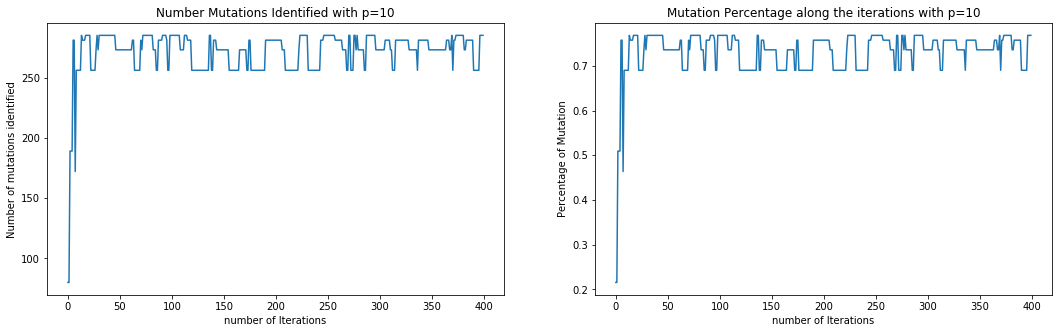

In [106]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=10

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[4][1]
y_2 = result_list[4][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=10' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=10' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [107]:
# print mutated sequence of each iterative with percentage of mutation, p=15

result_list[5][0]

['ATTTTTGATTTATTGAATTATGAAGTAATAAGGNNGGAGGGNATNANAAAGATAAGATTTATAAGAAGTTATAAAGAATTATTAAATGAGATTTATATTATGGGGGGAAAAATAAAGATTGGATTATAAATAAGTATTTAAAAGGAGATTTGAGTTTTGGAAATGAAAGAAGAAAAAGTAATAAAATGAAAAAGGATAAGTGAGATTAAAGAGAGAAAAAGATAAAAAAAAAATAATGGTGAGAGAGAAGTAGATTTAAAAGGAAAGAAAATAAATGTAGAGTGAAAAATAAATATGGGGTAGAAAGGAGAAGAGATTGAAAAAATNGGAATGGGAGAGTGGGAAAAGAGGGAAAATAAAAAGGAGAAAAA',
 'ATTTTTTATTTATTTAATTATTAATTAATAATTNNTTATTTNATNANAAATATAATATTTATAATAATTTATAAATAATTATTAAATTATATTTATATTATTTTTTTAAAAATAAATATTTTATTATAAATAATTATTTAAAATTATATTTTATTTTTTTAAATTAAATAATAAAAATTAATAAAATTAAAAATTATAATTTATATTAAATATATAAAAATATAAAAAAAAAATAATTTTTATATATAATTATATTTAAAATTAAATAAAATAAATTTATATTTAAAAATAAATATTTTTTATAAATTATAATATATTTAAAAAATNTTAATTTTATATTTTTAAAATATTTAAAATAAAAATTATAAAAA',
 'ATTTTTTATTTATTTAATTATTAATTAATAATTNNTTATTTNATNANAAATATAATATTTATAATAATTTATAAATAATTATTAAATTATATTTATATTATTTTTTTAAAAATAAATATTTTATTATAAATAATTATTTAAAATTATATTTTATTTTTTTAAATTAAATAATAAAAATTAATAAAATTAAAAATTATAATTTATATTAAATATATAAAAATATAAAAAAAAAATAATTTTTATATA

In [108]:
# print the number of mutations identified with p=15
result_list[5][1]

[80,
 172,
 172,
 172,
 164,
 164,
 164,
 164,
 164,
 164,
 164,
 193,
 193,
 285,
 285,
 285,
 285,
 285,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 273,
 273,
 273,
 273,
 281,
 256,
 256,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 281,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 281,
 273,
 273,
 273,
 285,
 285,
 281,
 285,
 256,
 256,
 256,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 285,
 256,
 256,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,

In [109]:
# print the percent of mutated with p=15
result_list[5][2]

[0.215633423180593,
 0.4636118598382749,
 0.4636118598382749,
 0.4636118598382749,
 0.4420485175202156,
 0.4420485175202156,
 0.4420485175202156,
 0.4420485175202156,
 0.4420485175202156,
 0.4420485175202156,
 0.4420485175202156,
 0.5202156334231806,
 0.5202156334231806,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7358490566037735,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.69002695417

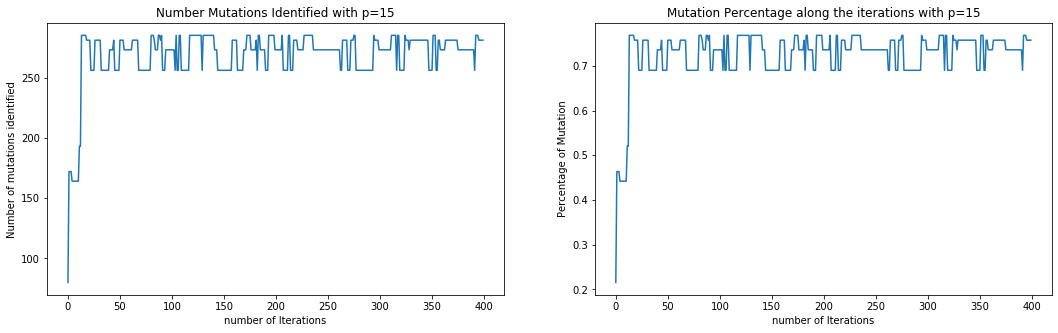

In [110]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=15

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[5][1]
y_2 = result_list[5][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=15' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=15' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

In [111]:
# print mutated sequence of each iterative with percentage of mutation, p=20

result_list[6][0]

['ATTTTTGATTTATTGTATTTTGAAGTATTTTGGNNGGAGGGNTTNANAATGATTTGTTTTATTAGTAGTTTTAAAGTTTTATTATTTGAGATTTATATTTTGGGGGGAAAAATTAAGATTGGATTATTAATATGTATTTTATAGGAGATTTGAGTTTTGGTTTTGATAGAAGAATATGTATTAATTTGAAAAAGGTTATGTGAGATTAAAGAGAGAAATAGTTAAATATTAAATTTTGGTGAGAGAGATGTTGATTTAAAAGGTTAGTTATTTATTGTAGTGTGATAATTTTTTTTGGGGTAGTTAGGAGTAGAGTTTGATTAATTNGGTATGGGAGTGTGGGTTATGAGGGTATTTTTTTAGGAGTTTAT',
 'ATTTTTGATTTATTGTATTTTGAAGTATTTTGGNNGGAGGGNTTNANAATGATTTGTTTTATTAGTAGTTTTAAAGTTTTATTATTTGAGATTTATATTTTGGGGGGAAAAATTAAGATTGGATTATTAATATGTATTTTATAGGAGATTTGAGTTTTGGTTTTGATAGAAGAATATGTATTAATTTGAAAAAGGTTATGTGAGATTAAAGAGAGAAATAGTTAAATATTAAATTTTGGTGAGAGAGATGTTGATTTAAAAGGTTAGTTATTTATTGTAGTGTGATAATTTTTTTTGGGGTAGTTAGGAGTAGAGTTTGATTAATTNGGTATGGGAGTGTGGGTTATGAGGGTATTTTTTTAGGAGTTTAT',
 'ATTTTTGATTTATTGTATTTTGAAGTATTTTGGNNGGAGGGNTTNANAATGATTTGTTTTATTAGTAGTTTTAAAGTTTTATTATTTGAGATTTATATTTTGGGGGGAAAAATTAAGATTGGATTATTAATATGTATTTTATAGGAGATTTGAGTTTTGGTTTTGATAGAAGAATATGTATTAATTTGAAAAAGGTTATGTGAGATTAAAGAGAGAAATAGTTAAATATTAAATTTTGGTGAGAGA

In [112]:
# print the number of mutations identified with p=20
result_list[6][1]

[80,
 80,
 80,
 189,
 189,
 193,
 285,
 285,
 285,
 285,
 285,
 193,
 193,
 193,
 193,
 193,
 193,
 285,
 285,
 365,
 365,
 365,
 365,
 365,
 365,
 365,
 365,
 365,
 365,
 365,
 281,
 256,
 256,
 256,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 281,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 281,
 281,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 281,
 281,
 281,
 281,
 285,
 285,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 256,
 285,
 281,
 281,
 281,
 281,
 281,
 281,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 281,
 273,
 273,
 285,
 285,
 285,
 285,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 273,
 273,
 273,
 273,
 256,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 273,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 285,
 256,
 

In [113]:
# print the percent of mutated with p=20
result_list[6][2]

[0.215633423180593,
 0.215633423180593,
 0.215633423180593,
 0.5094339622641509,
 0.5094339622641509,
 0.5202156334231806,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808625,
 0.5202156334231806,
 0.5202156334231806,
 0.5202156334231806,
 0.5202156334231806,
 0.5202156334231806,
 0.5202156334231806,
 0.7681940700808625,
 0.7681940700808625,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.9838274932614556,
 0.7574123989218329,
 0.6900269541778976,
 0.6900269541778976,
 0.6900269541778976,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7574123989218329,
 0.7681940700808625,
 0.7681940700808625,
 0.7681940700808

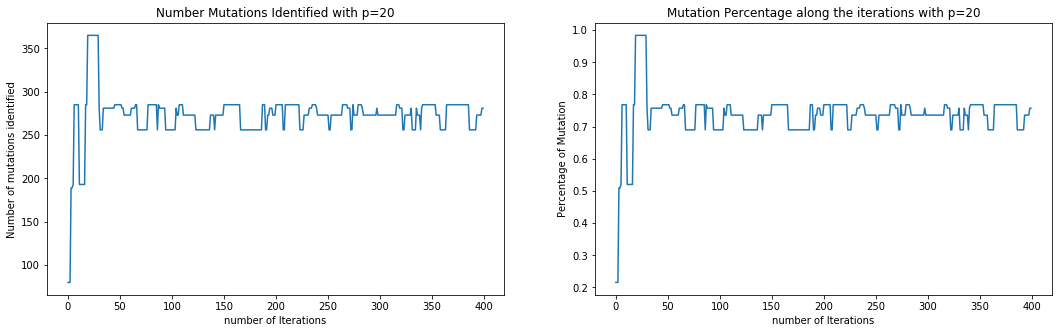

In [114]:
# the number of mutations identified and its percentage of mutation along the iterations (400) with p=20

fig = plt.figure(figsize=(18,5))

x = list(range(0, 400))
y_1 = result_list[6][1]
y_2 = result_list[6][2]

plt . subplot ( 121 ) 
plt . plot ( x ,  y_1 ) 
plt . title ( 'Number Mutations Identified with p=20' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Number of mutations identified")

plt . subplot ( 122 ) 
plt . plot ( x ,  y_2 ) 
plt . title ( 'Mutation Percentage along the iterations with p=20' ) 
plt.xlabel("number of Iterations")
plt.ylabel("Percentage of Mutation")
plt.show()

Each plot with different percentages of mutation shows a similar pattern. At every plot, it represents that the number of mutations identified increasing rapidly at the beginning of iterations and then showing relatively little changes (staying consistency) after a certain iteration. A possible reason for showing this pattern is a limited accepted mutation point. As mutation of amino acids may occur because not all amino acids are not important to be keeping its function, some of them could be replaced by similar chemical characteristics without losing its unique functionality. In other words, some crucial amino acids for keeping its unique function must not be replaced by others. 